# Suicides in the World 1985 - 2016

### The data that I am using are the number of suicides for each country between the years 1985 and 2016. Originally, I was just curious about the number of suicides over the past few decades but then I wanted to see how different countries compared to the US in these terms. Also, I suspected that suicides have increased over the decades but I wanted to find out how much. The data comes from the World Health Organization via Kaggle. I don't have any emotional connection to suicides. That said, I hope that there is a way to lower suicides.
    
### 1. How many suicides have there been in the United States since 1985?
### 2. Do other countries also have similar trends in suicides since 1985?
### 3. How do suicide trends compare with population trends in the United States?

### Further research should include more factors such as method of suicide, time of suicide,  and who the victim was discovered by to better assess where these suicides are happening. With this information, we could some find ways to decrease suicides around the world. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#input data
df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\master.csv', thousands=',')

#Stripping space from column names
df.columns = df.columns.str.strip()

#Using column names as references
print(df.columns) 
print('\n')
print(df.dtypes)



Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object


In [2]:
#Beginning of the data
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,2156624900,796,Generation X


In [3]:
#End of the data
df.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,63067077179,2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,63067077179,2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,63067077179,2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,63067077179,2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,63067077179,2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,63067077179,2309,Boomers


In [4]:
#Taking a look at the measures of central tendency
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [5]:
#A list of the columns and knowing what kind of data is input in the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year ($)      27820 non-null int64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [6]:
#Seeing how many cells don't have any data input
df.isna().sum()


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
#creating smaller sets of data to work with 
df2 = df.groupby(['country','year'])['suicides_no'].sum()
df3 = df.groupby(['country','year'])['population'].sum()
df4 = df.groupby(['country','year'])['gdp_for_year ($)'].sum()

#Checking to see if the data is what I am looking for
print(df2.head())
print(df3.head())
print(df4.head())


country  year
Albania  1987    73
         1988    63
         1989    68
         1992    47
         1993    73
Name: suicides_no, dtype: int64
country  year
Albania  1987    2709600
         1988    2764300
         1989    2803100
         1992    2822500
         1993    2807300
Name: population, dtype: int64
country  year
Albania  1987    25879498800
         1988    25512000000
         1989    28021499856
         1992     8513431008
         1993    14736852456
Name: gdp_for_year ($), dtype: int64


In [8]:
#Taking the previous dataframe and resetting it
df2 = df2.reset_index()

In [9]:
#Checking that the data is what I am checking for
usa2 = df2[(df2.country == 'United States')]
print(usa2.head())

            country  year  suicides_no
2240  United States  1985        29446
2241  United States  1986        30892
2242  United States  1987        30783
2243  United States  1988        30388
2244  United States  1989        30218


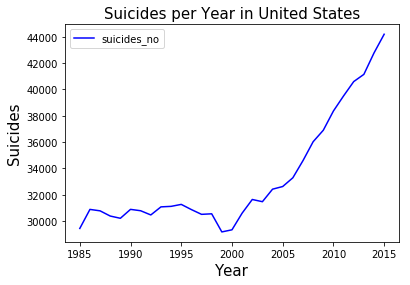

In [10]:
#Scatter plot of Suicides in the United States between the years 1985 and 2015
usa2.plot(x='year', y='suicides_no', color='blue')
plt.title("Suicides per Year in United States", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()


### From the year 2000, there has been a large increase of suicides. Some possible explanations for the increase could be the influx of instant messaging and the beginnings of social media where cyber bullying was not accounted for. 

In [11]:
df3 = df3.reset_index()


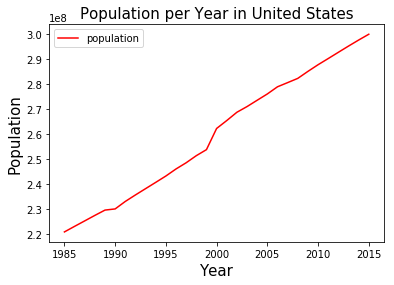

In [12]:
usa3 = df3[(df3.country == 'United States')]
usa3.plot(x='year', y='population', color='red')
plt.title("Population per Year in United States", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Population",fontsize=15)
plt.show()


### Population has increased steadily over the 30 year period between 1985 and 2015. That may have more impact on the increase of suicides than any other factor.

In [13]:
#maximum number of suicides in the US
usa2['suicides_no'].max()

44189

In [14]:
#minimum number of suicides in the US
usa2['suicides_no'].min()

29183

In [15]:
usa = df.groupby(['country','year', 'sex'])['suicides_no'].sum()

usa = usa.reset_index()

print(usa.head())

   country  year     sex  suicides_no
0  Albania  1987  female           25
1  Albania  1987    male           48
2  Albania  1988  female           22
3  Albania  1988    male           41
4  Albania  1989  female           15


Text(0.5, 0, 'Age Groups')

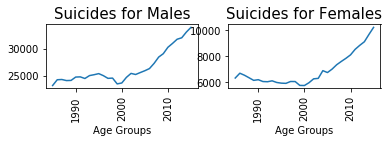

In [16]:

usagender = usa[(usa.country == 'United States')]

male = usagender[usagender.sex == 'male']

female = usagender[usagender.sex == 'female']

#This separates the double plot points into a single graph for males
plt.subplot(321) 
plt.plot(male['year'], male['suicides_no'])
plt.xticks(rotation=90)
plt.title("Suicides for Males", fontsize=15)
plt.xlabel("Age Groups",fontsize=10)
#plt.ylabel("Suicides for Males",fontsize=10)


#This separates the double plot points into a single graph for females
plt.subplot(322) 
plt.plot(female['year'], female['suicides_no'])
plt.xticks(rotation=90)
plt.title("Suicides for Females", fontsize=15)
plt.xlabel("Age Groups",fontsize=10)
#plt.ylabel("Suicides for Females",fontsize=10


Text(0.5, 0, 'Age Groups')

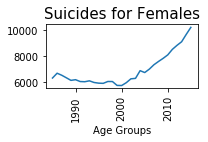

In [17]:

#This separates the double plot points into a single graph for females
plt.subplot(322) 
plt.plot(female['year'], female['suicides_no'])
plt.xticks(rotation=90)
plt.title("Suicides for Females", fontsize=15)
plt.xlabel("Age Groups",fontsize=10)
#plt.ylabel("Suicides for Females",fontsize=10

### Suicide numbers for male and female follow the same increasing trend particularly from the year 2000 through 2015. However, it should be noted that female suicides are less than half the number of male suicides at all points of the graph. So while the population is committing suicides in greater numbers, women commit suicide less than men. Another possibility is that men are listed with suicide as a cause of death after autopsies in greater numbers than women. 

In [18]:
#Creating a dataframe for Jamaica
jam2 = df2[(df2.country == 'Jamaica')]
print(jam2)


      country  year  suicides_no
1098  Jamaica  1985            8
1099  Jamaica  1986            1
1100  Jamaica  1987           13
1101  Jamaica  1988            5
1102  Jamaica  1989            0
1103  Jamaica  1990            3
1104  Jamaica  1991            1
1105  Jamaica  2000            3
1106  Jamaica  2001            5
1107  Jamaica  2002            2
1108  Jamaica  2003            2
1109  Jamaica  2004            1
1110  Jamaica  2005           51
1111  Jamaica  2006            0
1112  Jamaica  2009           36
1113  Jamaica  2010            3
1114  Jamaica  2011           50


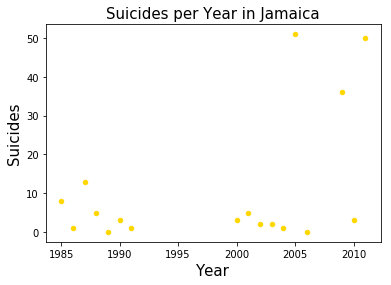

In [19]:
#Used a scatter plot to show the lack of data between 1991-2000 and 2011-2015
jam2.plot.scatter(x='year', y='suicides_no', color='gold')
plt.title("Suicides per Year in Jamaica", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()


### I wanted to see how a smaller country compared to the United States. Jamaica has considerably less suicides than the US but I'm curious how the murder rate may compare. I chose to use a scatter plot to represent the missing data between the years 1991 and 2000 as well as after 2011. Jamaica had some spikes in the recent years but has had fairly low suicide rates. 

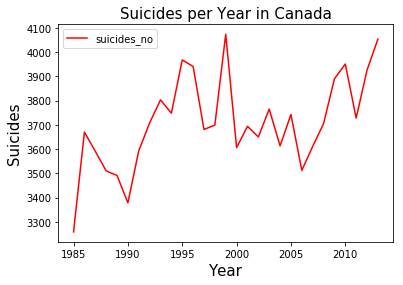

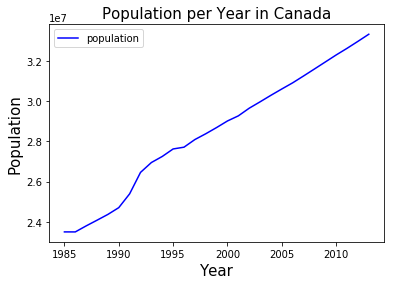

In [20]:

can2 = df2[(df2.country == 'Canada')]
can2.plot(x='year', y='suicides_no', color='red')
plt.title("Suicides per Year in Canada", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()

can3 = df3[(df3.country == 'Canada')]
can3.plot(x='year', y='population', color='blue')
plt.title("Population per Year in Canada", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Population",fontsize=15)
plt.show()


### Canada has had volatility in the number of suicides. There has not been a steady increase or decrease as in the US and Mexico. However the population has steadily increased which is similar to the United States but not explaining the volatility in suicides.

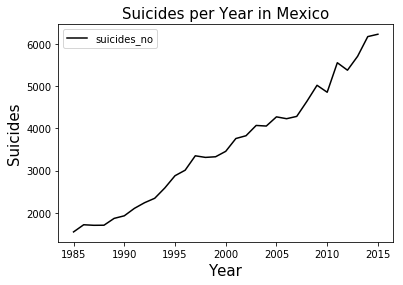

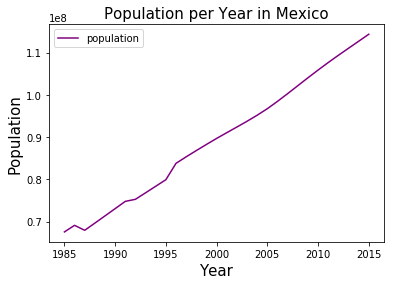

In [21]:
mex2 = df2[(df2.country == 'Mexico')]
mex2.plot(x='year', y='suicides_no', color='black')
plt.title("Suicides per Year in Mexico", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()

mex3 = df3[(df3.country == 'Mexico')]
mex3.plot(x='year', y='population', color='purple')
plt.title("Population per Year in Mexico", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Population",fontsize=15)
plt.show()

### Mexico has also experienced a steady increase in suicides. There seems to be a North American trend of increasing suicides over the years. However, that could be from the increased population living on the continent. 

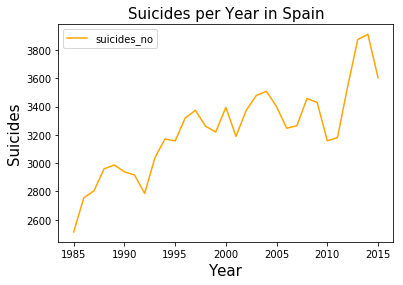

In [22]:
spa2 = df2[(df2.country == 'Spain')]
spa2.plot(x='year', y='suicides_no', color='orange')
plt.title("Suicides per Year in Spain", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()

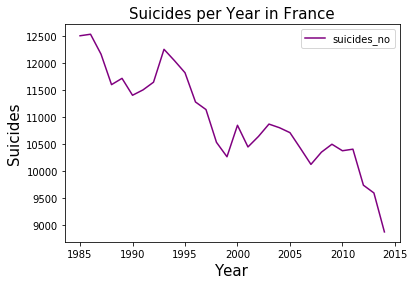

In [23]:
fra2 = df2[(df2.country == 'France')]
fra2.plot(x='year', y='suicides_no', color='purple')
plt.title("Suicides per Year in France", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()

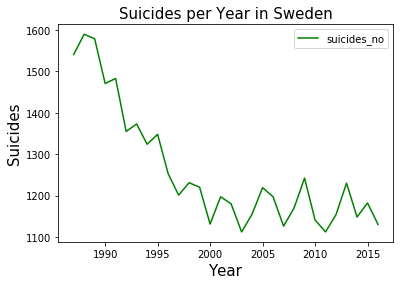

In [24]:
swe2 = df2[(df2.country == 'Sweden')]
swe2.plot(x='year', y='suicides_no', color='green')
plt.title("Suicides per Year in Sweden", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()

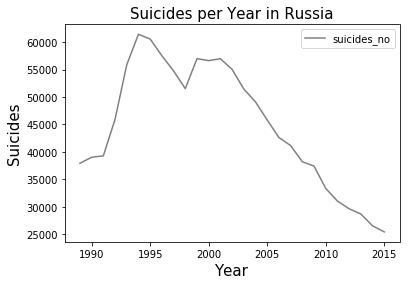

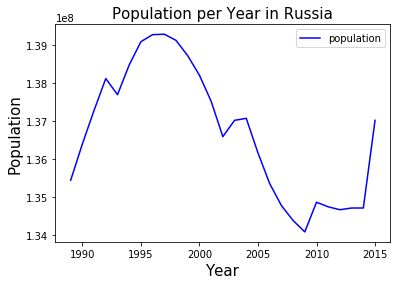

In [25]:
rus2 = df2[(df2.country == 'Russian Federation')]
rus2.plot(x='year', y='suicides_no', color='gray')
plt.title("Suicides per Year in Russia", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()

rus3 = df3[(df3.country == 'Russian Federation')]
rus3.plot(x='year', y='population', color='blue')
plt.title("Population per Year in Russia", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Population",fontsize=15)
plt.show()

### European and Russian suicides have decreased over the years with exception for Spain. France, Sweden, and Russia have all had their declines in different decades where I would like to investigate more why those countries experienced this. Spain has had a recent drop but still has far less suicides than France or Russia. 

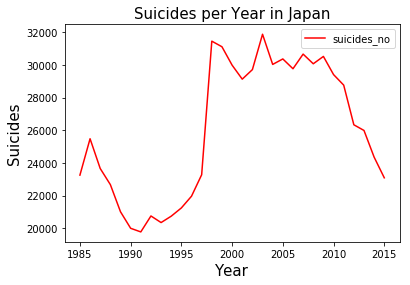

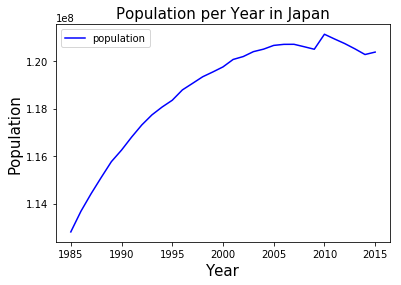

In [26]:
jap2 = df2[(df2.country == 'Japan')]
jap2.plot(x='year', y='suicides_no', color='red')
plt.title("Suicides per Year in Japan", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Suicides",fontsize=15)
plt.show()

jap3 = df3[(df3.country == 'Japan')]
jap3.plot(x='year', y='population', color='blue')
plt.title("Population per Year in Japan", fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Population",fontsize=15)
plt.show()

### Japan had a large spike in suicides between 1995 and 2000 but then had a similar decrease between the years 2010 to 2016. I am curious as to what may be the causes of these numbers. The population is booming over the time of our series and does not seem to have an effect on suicides. 